# Mall Customer Segmentation


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

Data Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


Distribution Analysis

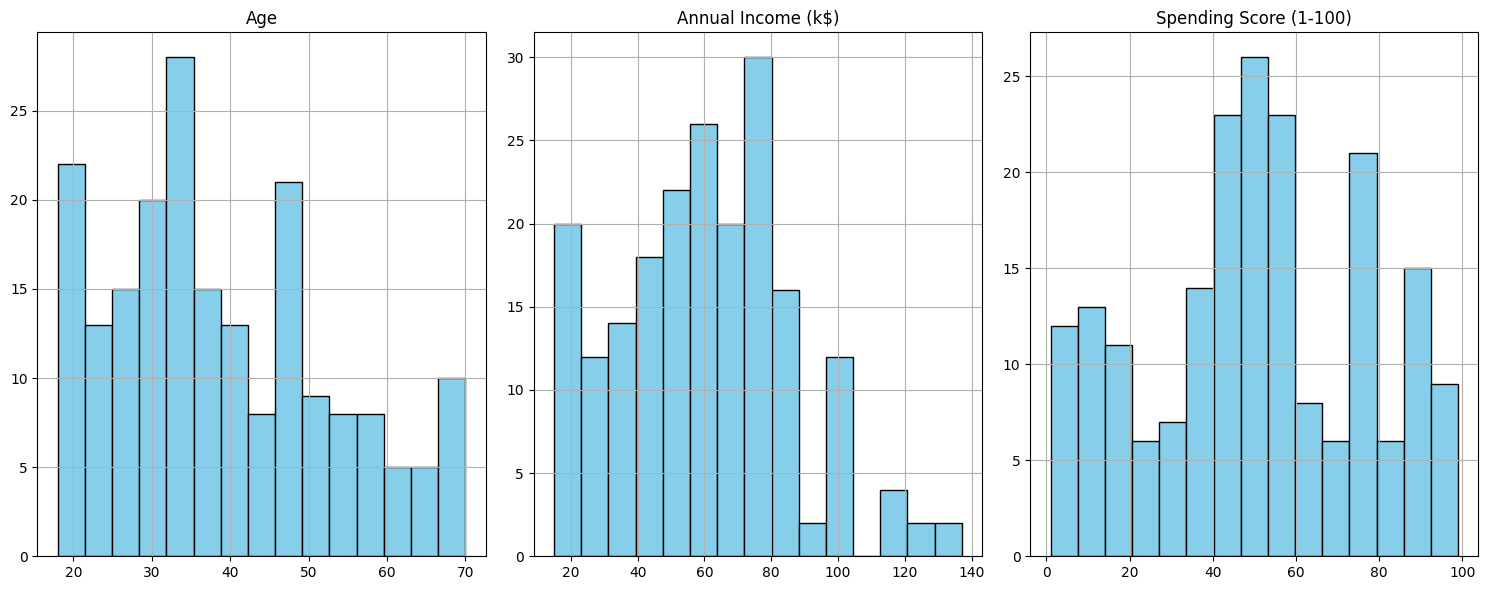

In [6]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[features].hist(figsize=(15, 6), bins=15, layout=(1, 3), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

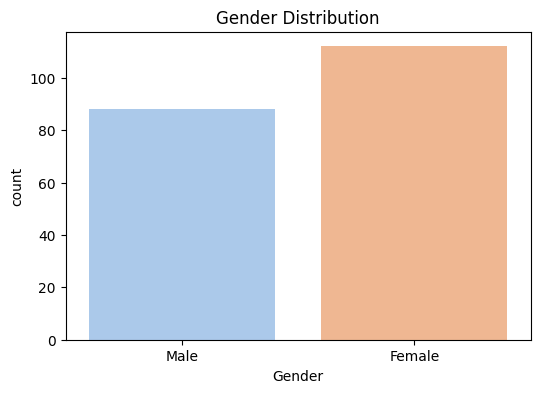

In [7]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

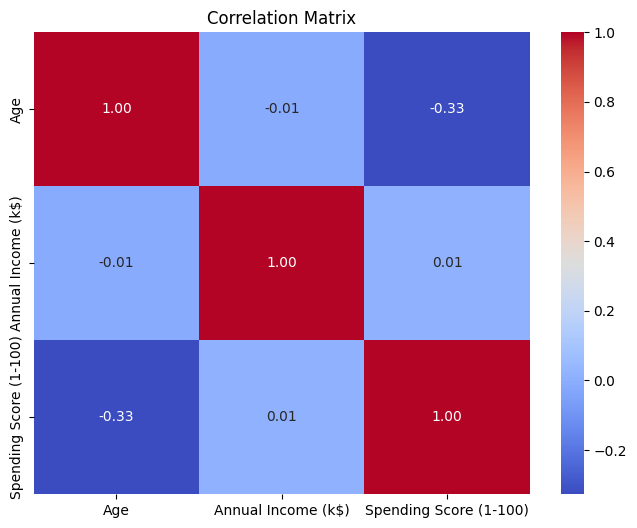

In [8]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


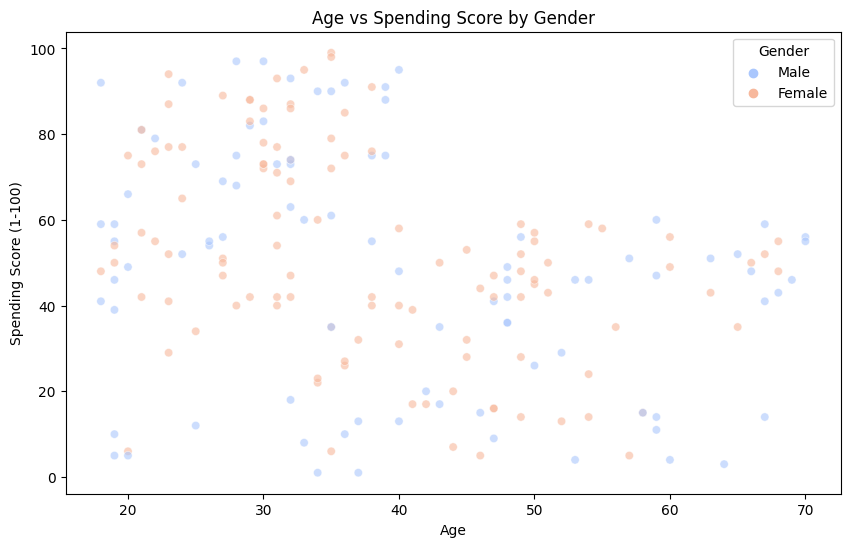

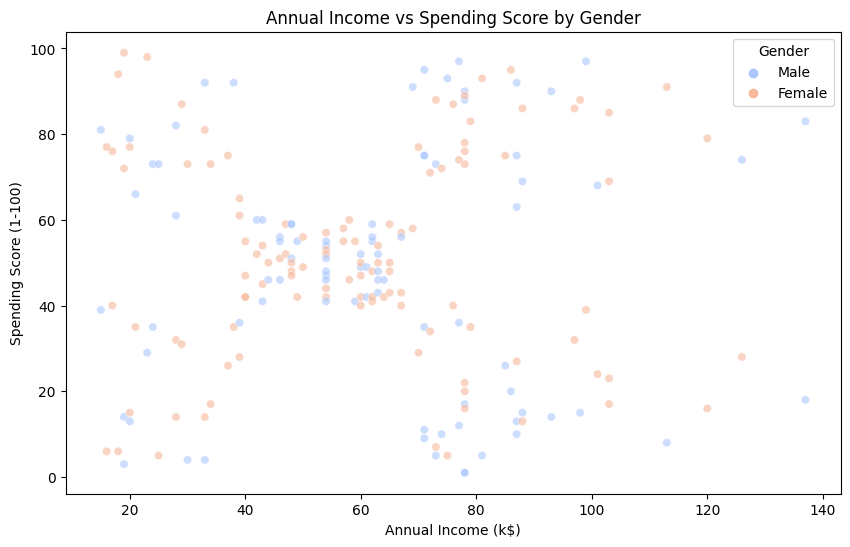

In [9]:
# Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', palette='coolwarm', alpha=0.6)
plt.title('Age vs Spending Score by Gender')
plt.show()

# Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm', alpha=0.6)
plt.title('Annual Income vs Spending Score by Gender')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

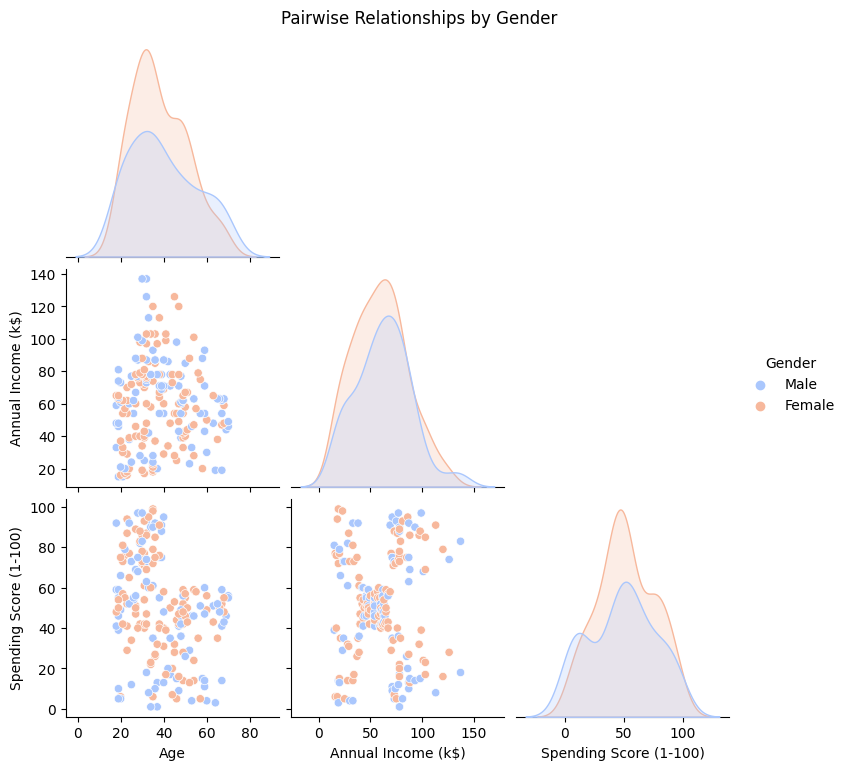

In [10]:
# Pairwise relationships
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', palette='coolwarm', corner=True)
plt.suptitle('Pairwise Relationships by Gender', y=1.02)
plt.show()


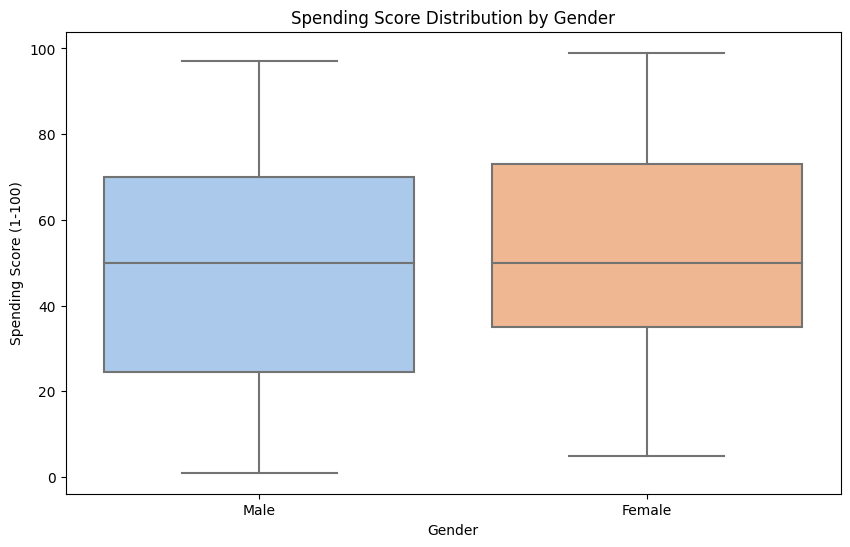

In [11]:
# Spending Score Distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel')
plt.title('Spending Score Distribution by Gender')
plt.show()

Feature Engineering and Selection

In [12]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Features to be used for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

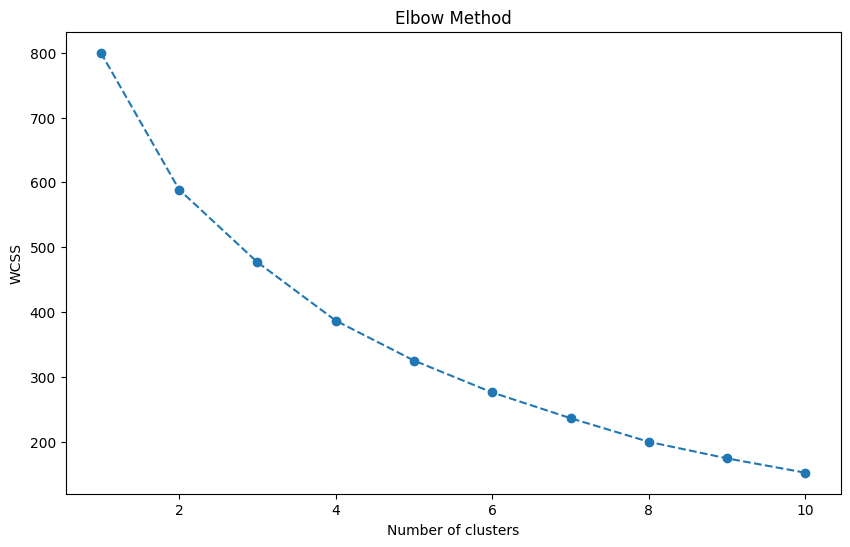

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The "elbow" appears to be at k=5, where the WCSS starts to decrease at a slower rate. This indicates that additional clusters beyond this point do not explain much more of the variance in the data. Therefore, for this dataset, 5 clusters would be a good number to use for k-means clustering.

k-Means Clustering

In [14]:
# Assuming the elbow plot shows that the optimal number of clusters is 5
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

Cluster Analysis

In [15]:
for i in range(n_clusters):
    cluster = df[df['Cluster'] == i]
    print(f"Cluster {i+1}:")
    print(cluster[features].mean())
    print('\n')

Cluster 1:
Age                       28.345455
Annual Income (k$)        60.800000
Spending Score (1-100)    68.654545
Gender                     0.000000
dtype: float64


Cluster 2:
Age                       28.250
Annual Income (k$)        62.000
Spending Score (1-100)    71.675
Gender                     1.000
dtype: float64


Cluster 3:
Age                       48.720930
Annual Income (k$)        46.186047
Spending Score (1-100)    39.674419
Gender                     0.000000
dtype: float64


Cluster 4:
Age                       55.903226
Annual Income (k$)        48.774194
Spending Score (1-100)    38.806452
Gender                     1.000000
dtype: float64


Cluster 5:
Age                       40.419355
Annual Income (k$)        90.000000
Spending Score (1-100)    15.741935
Gender                     0.548387
dtype: float64




Cluster Visualization

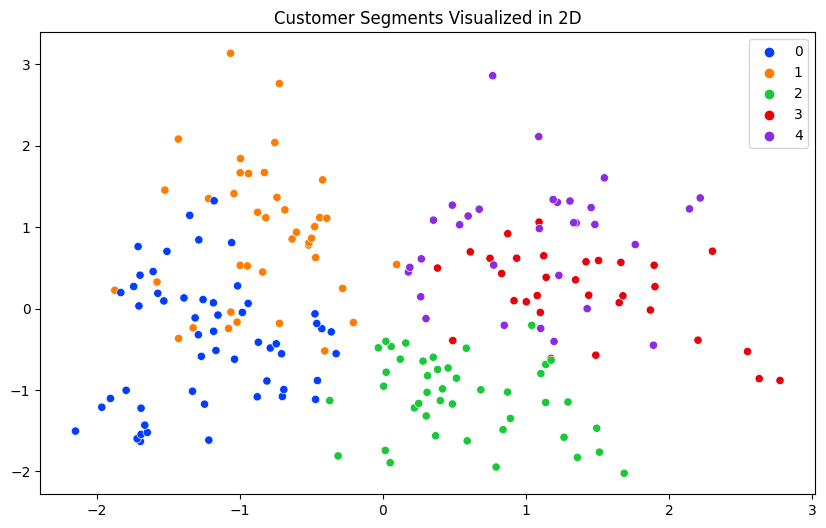

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='bright')
plt.title('Customer Segments Visualized in 2D')
plt.show()

In summary, the visualization suggests that the clustering approach was effective in segmenting the customers into distinct groups. The next step would be to profile each cluster to understand their defining characteristics, which would involve looking back at the original features relative to each cluster. This information could then inform targeted marketing strategies, product development, and customer service approaches.

Hierarchical/Agglomerative Clustering

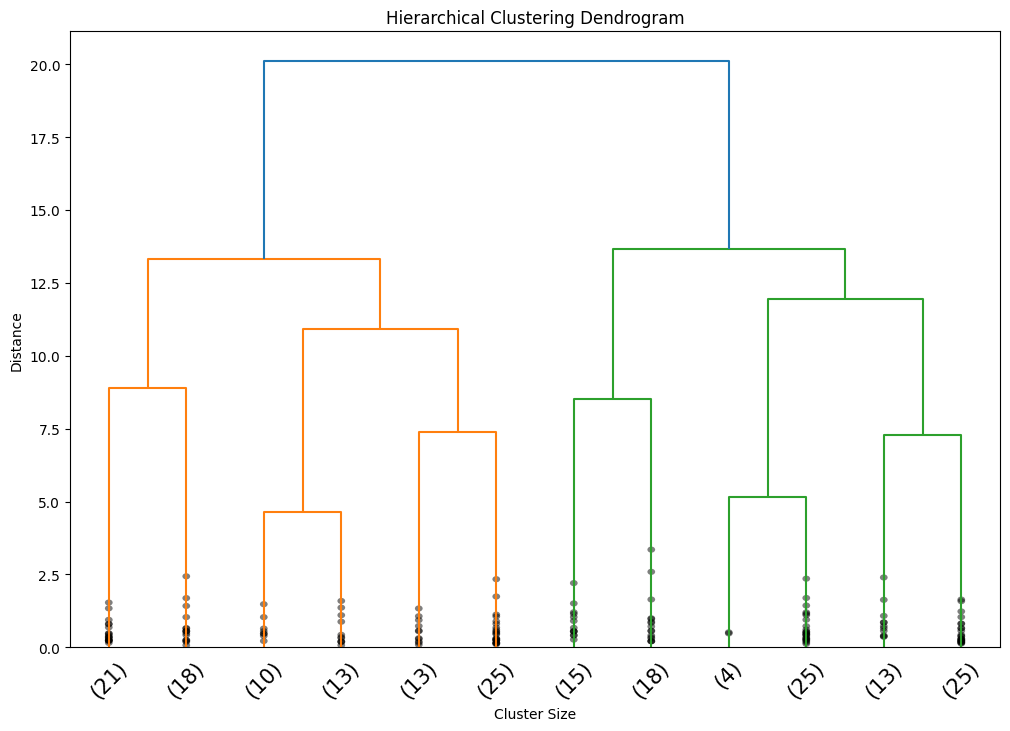

In [17]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [18]:
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
df['HCluster'] = clusters

DBSCAN

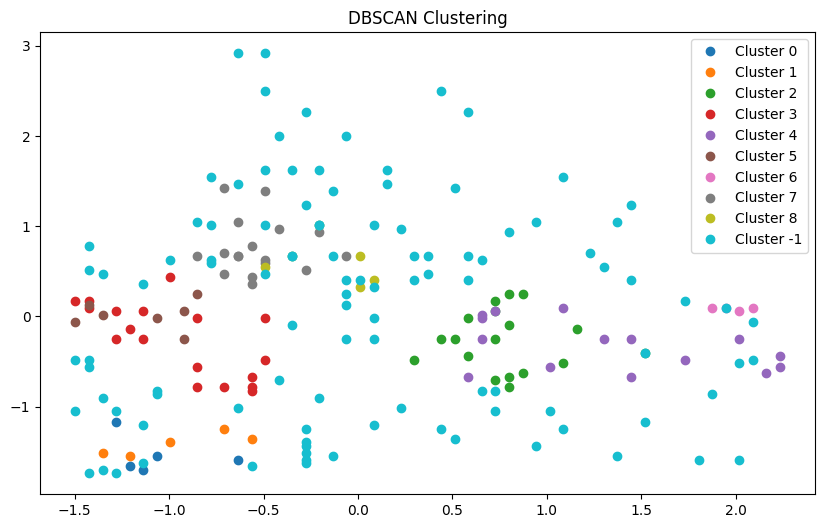

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = labels

plt.figure(figsize=(10, 6))
unique_labels = set(labels)
for label in unique_labels:
    plt.plot(X_scaled[labels == label, 0], X_scaled[labels == label, 1], 'o', label=f'Cluster {label}')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [20]:
submission = pd.DataFrame({
    'CustomerID': df['CustomerID'],
    'Cluster': df['Cluster']
})
submission.to_csv(r'C:\Users\saish\OneDrive\Desktop\Internships\Prodigy Infotech\Mall_Customers\submission_customer_segmentation.csv', index=False)
print("\nSubmission file created at: C:\\Users\\saish\\OneDrive\\Desktop\\Internships\\Prodigy Infotech\\Mall_Customers\\submission_customer_segmentation.csv")


Submission file created at: C:\Users\saish\OneDrive\Desktop\Internships\Prodigy Infotech\Mall_Customers\submission_customer_segmentation.csv
